**Задание 1** Реализуйте функции, необходимые для вычисления правдоподобия и логарифма правдоподобия.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
np.prod([1,2,3])

6

In [6]:
def p_hat(p, y):
    # p - предсказанная моделью вероятность класса 1
    # y - реальный класс (0 или 1)

    # функция должна вернуть вероятность класса y, при предсказании
    # модели p

    # < YOUR CODE STARTS HERE >
    if y == 1:
        return p
    return 1 - p

    # < YOUR CODE ENDS HERE >

def log_p_hat(p, y):
    return np.log(p_hat(p, y))

def likelihood(ps, ys):
    # ps - предсказанные вероятности класса 1 моделю для N объектов
    # ys - реальные классы N объектов

    # функция должна использовать p_hat и возвращать правдоподобие

    likelihood_ = None
    # < YOUR CODE STARTS HERE >

    likelihood_ = np.prod([p_hat(p,y) for p, y in zip(ps, ys)])
    # < YOUR CODE ENDS HERE >
    return likelihood_

def loglikelihood(ps, ys):
    # ps - предсказанные вероятности класса 1 моделю для N объектов
    # ys - реальные классы N объектов

    # функция должна использовать log_p_hat и возвращать логарифм правдоподобия
    # (на количество делить не нужно)

    p = np.clip(ps, a_min=1e-6, a_max=1-1e-6)
    log_probs = [log_p_hat(p, y) for (p, y) in zip(ps, ys)]
    loglikelihood_ = None
    # < YOUR CODE STARTS HERE >
    loglikelihood_ = np.sum(log_probs)
    # < YOUR CODE ENDS HERE >
    return loglikelihood_


In [7]:
test_ps = [0.1, 0.2, 0.3, 0.4]
test_ys = [0, 1, 0, 1]
assert likelihood(test_ps, test_ys) == 0.0504
assert np.allclose(np.log(likelihood(test_ps, test_ys)), loglikelihood(test_ps, test_ys))
print("Tests passed!")

Tests passed!


**Задание 2** Применение принципа максимума правдоподобия на практике.

Предположим у нас имеется монетка, подбросив которую 10 раз мы получили следующие результаты (0 -- решка, 1 -- орел):

$$
y = [1, 0, 1, 1, 1, 1, 0, 0, 0, 1]
$$

Наша задача узнать "параметры" этой монетки, а именно вероятность выпадения орла ($p$).

Интуитивно понятно, что $p=0.6$, но давайте теперь получим это значение с помощью принципа максимума правдоподобия.

Ваша задача используя код ниже показать что правдоподобие и его логарифм достигают экстремумов в 0.6. Мы будем это делать "в лоб". А именно мы посчитаем их значения для всех возможных вероятностей (с шагом 0.01) и визуально оценим их.

*Подсказка: монетка это модель, которая не зависит от объекта и имеет только один параметр -- с какой вероятностью она выпадает орлом.*


In [8]:
[0.1]*5


[0.1, 0.1, 0.1, 0.1, 0.1]

In [9]:
coins = np.array([1, 0, 1, 1, 1, 1, 0, 0, 0, 1])

N = 100
p_to_try =  np.linspace(0, 1, N)

# < YOUR CODE STARTS HERE >
# Переменная liks должна содержать значения правдоподобия для каждой из 100 вероятностей в p_to_try.
# Переменная logliks должна содержать значения логарифма правдоподобия для каждой из 100 вероятностей в p_to_try.

liks = [likelihood([p]*len(coins), coins) for p in p_to_try]
logliks =[loglikelihood([p]*len(coins), coins) for p in p_to_try]

# < YOUR CODE ENDS HERE >

/tmp/ipykernel_333591/1328455044.py:16: RuntimeWarning: divide by zero encountered in log
  return np.log(p_hat(p, y))


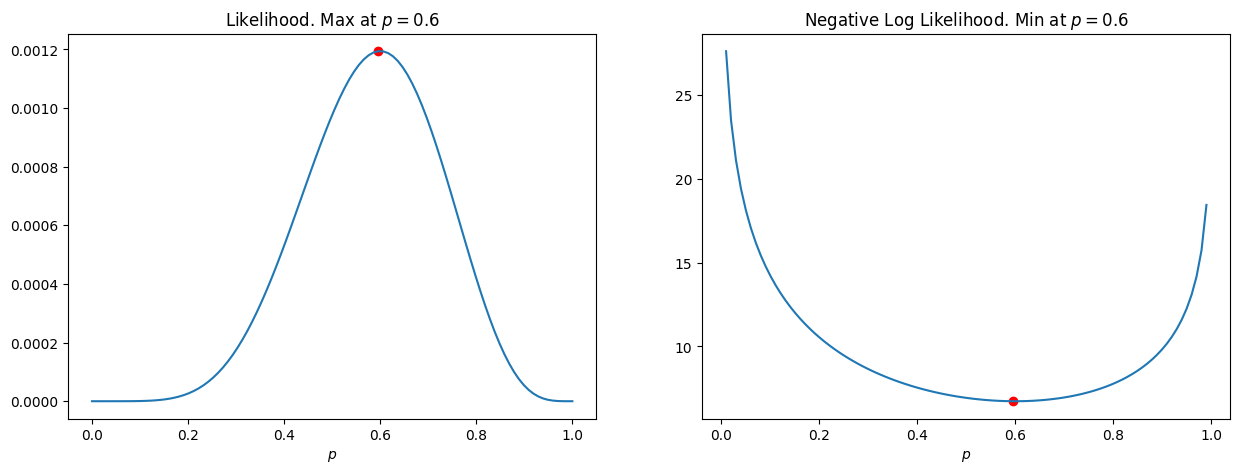

In [10]:
max_lik_ind = np.argmax(liks)
max_loglik_ind = np.argmax(logliks)

fig = plt.figure(figsize=(15, 5))
grid = plt.GridSpec(1, 2)
plt.subplot(grid[0, 0])
plt.plot(p_to_try, liks)
plt.xlabel("$p$")
plt.title(f"Likelihood. Max at $p={p_to_try[max_lik_ind]:.2}$")
plt.scatter(p_to_try[max_lik_ind], liks[max_lik_ind], c='red')

plt.subplot(grid[0, 1])
plt.plot(p_to_try, -np.array(logliks))
plt.scatter(p_to_try[max_loglik_ind], -logliks[max_loglik_ind], c='red')
plt.title(f"Negative Log Likelihood. Min at $p={p_to_try[max_loglik_ind]:.2}$")
_ = plt.xlabel("$p$")

**Задание 3 (бонусное)**
Попробуйте доказать что максимум правдоподобия для задачи с монеткой достигается в общем случае при $p = \frac{m}{N}$ , где $m$ -- количество выпавших единиц, а $N$ -- общее число подбрасываний. *Рекомендуем предварительно воспользоваться логарифмированием (т.е. перейти максимизировать log likelihood)*

/tmp/ipykernel_333591/1328455044.py:16: RuntimeWarning: divide by zero encountered in log
  return np.log(p_hat(p, y))


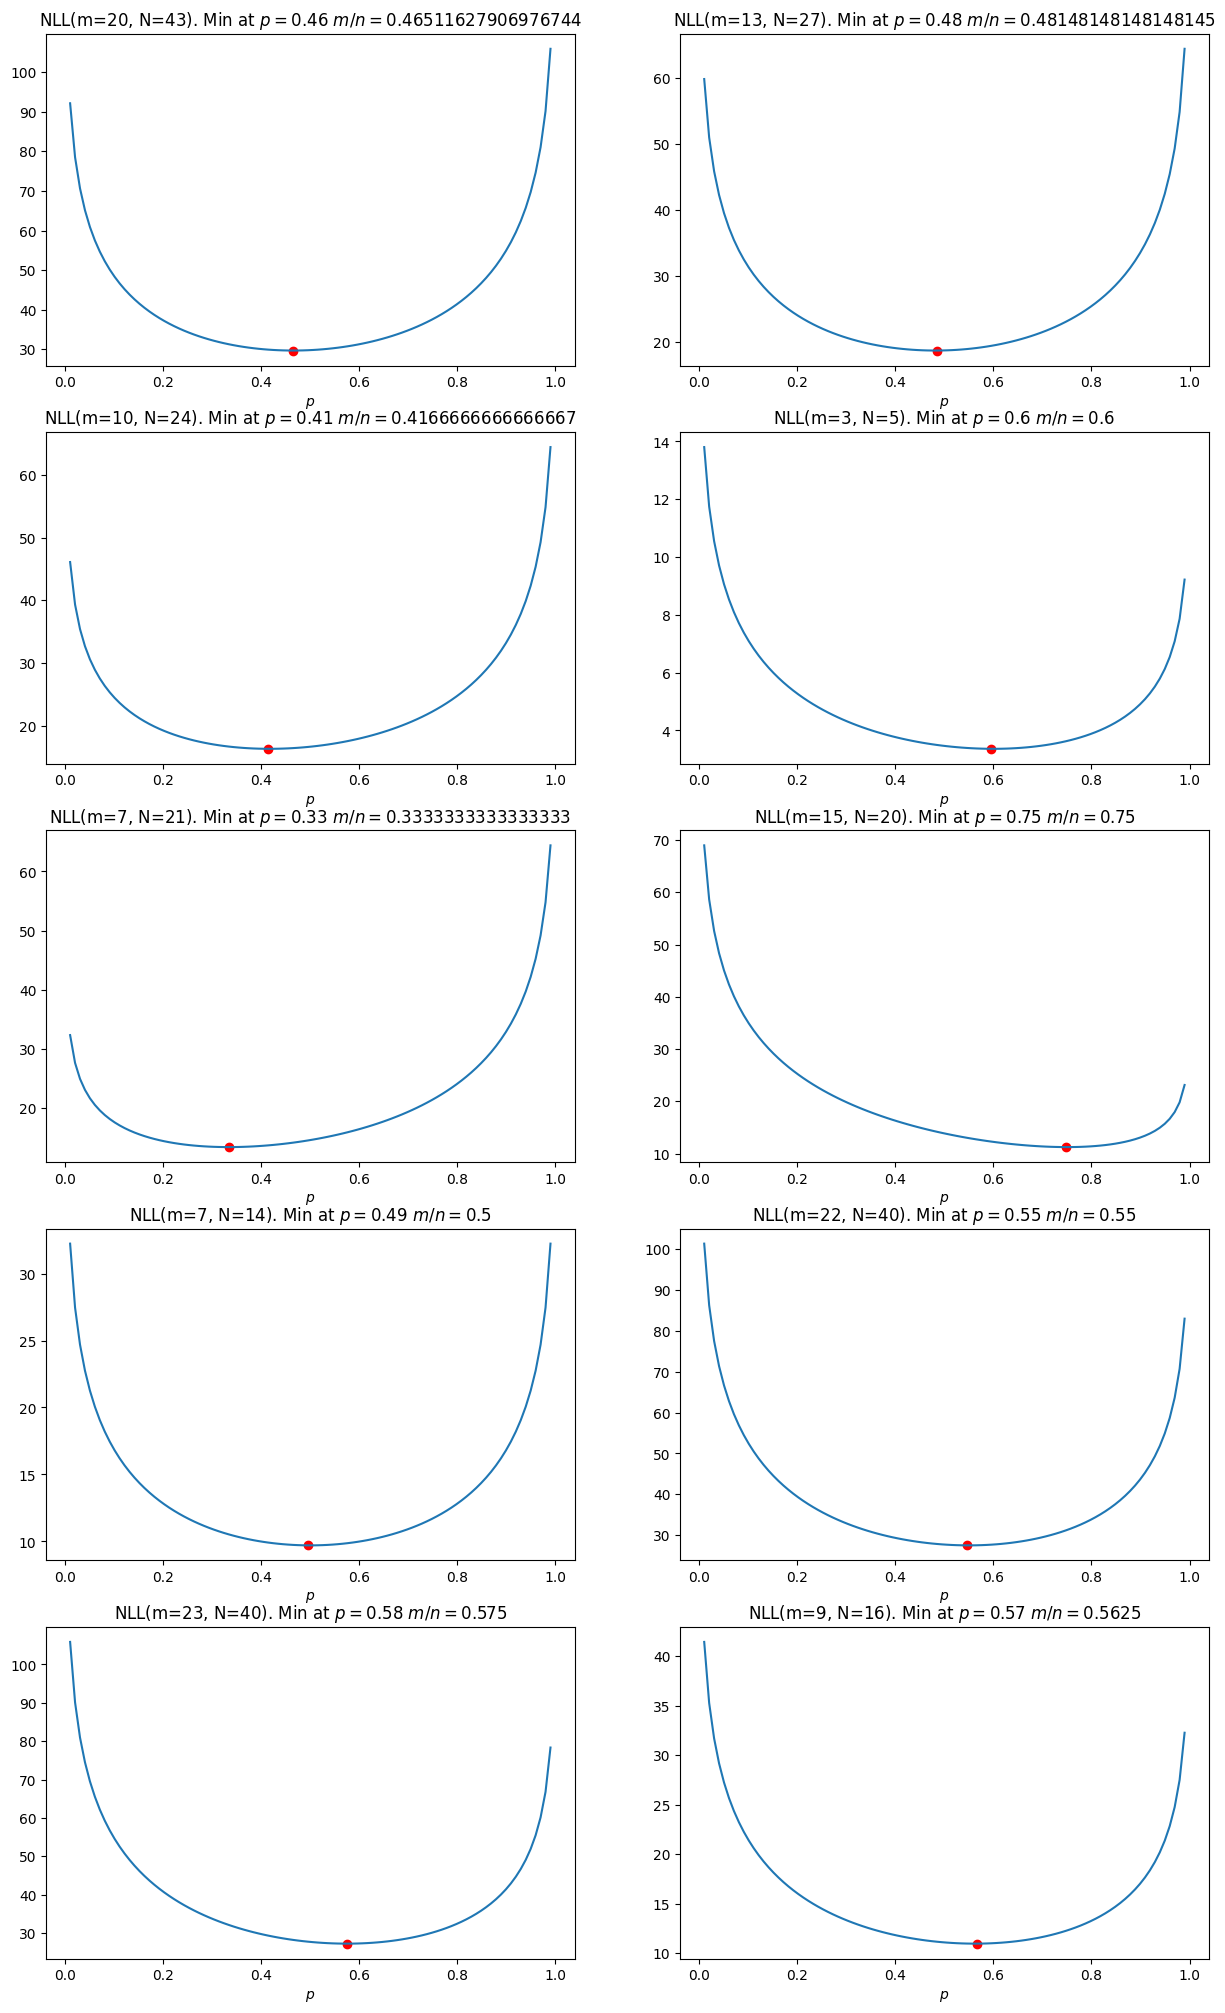

In [24]:
fig = plt.figure(figsize=(15, 25))
grid = plt.GridSpec(5, 2)
for i in range(10):
    coins = np.random.randint(0,2, np.random.randint(5,50))
    p_to_try =  np.linspace(0, 1, 100)
    logliks =[loglikelihood([p]*len(coins), coins) for p in p_to_try]
    max_loglik_ind = np.argmax(logliks)

    plt.subplot(grid[i // 2, i % 2])
    plt.plot(p_to_try, -np.array(logliks))
    plt.scatter(p_to_try[max_loglik_ind], -logliks[max_loglik_ind], c='red')
    plt.title(f"NLL(m={sum(coins)}, N={len(coins)}). Min at $p={p_to_try[max_loglik_ind]:.2}$ $m/n={sum(coins)/len(coins)}$")
    _ = plt.xlabel("$p$")